# Imports and setup

## Python libraries

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
from multiprocessing import Pool, Manager
import itertools
import pandas as pd
import time
import csv

In [2]:
import datetime

## Pys and Pyxs

In [3]:
import plot_init as pu
from model_v_4_20 import Road
#from simulation import simulate

In [4]:
# matplotlib.rcParams.update(pu.params)
matplotlib.rcParams.update(pu.params)

plt.rcParams["figure.figsize"]

[3.5, 2.625]

In [5]:
from plotter_functions import *

In [6]:
from plotter_functions import *
from sim_fns import *

In [31]:
def qdens_plotter2(densities, med_array, err_array, marker, in_color, linestyle, plot_label):
    final_err_erray = np.array(err_array).T
    plt.errorbar(densities, med_array,final_err_erray, marker = marker, markersize=5, markerfacecolor = in_color, linestyle = linestyle, color = 'black', markeredgecolor='black', ecolor=in_color, label=plot_label)

# Throughput 

## PARAMETERS

In [7]:
sim_time = 3000
trans_time = 1000
roadlength = 500
num_trials = 50
#num_lanes = 1


vmax = 5
p_slow = 0.1
periodic = True

#frac_tnv = 0
#alpha = 0
#tnv_wait_time = 5
station_period = 1
#num_lanes = 2


In [8]:
#num_trials=50
densities = np.linspace(0.1, 0.9, 25)
tnv_fracs = [0.1, 0.5, 1.0]
wait_times = [1, 2, 5, 10]
trials = range(num_trials)

In [9]:
densities

array([0.1       , 0.13333333, 0.16666667, 0.2       , 0.23333333,
       0.26666667, 0.3       , 0.33333333, 0.36666667, 0.4       ,
       0.43333333, 0.46666667, 0.5       , 0.53333333, 0.56666667,
       0.6       , 0.63333333, 0.66666667, 0.7       , 0.73333333,
       0.76666667, 0.8       , 0.83333333, 0.86666667, 0.9       ])

In [10]:
densities2 = densities/2

print(densities2)

[0.05       0.06666667 0.08333333 0.1        0.11666667 0.13333333
 0.15       0.16666667 0.18333333 0.2        0.21666667 0.23333333
 0.25       0.26666667 0.28333333 0.3        0.31666667 0.33333333
 0.35       0.36666667 0.38333333 0.4        0.41666667 0.43333333
 0.45      ]


In [11]:
high_densities = np.linspace(0.1, 0.5, 10)
low_densities = np.linspace(0.5, 0.9, 10)

high_densities2 = high_densities/2
low_densities = low_densities/2

In [12]:
strats = [ [1,0,0], [0,1,0], [0.5,0.5,0], [0.75,0.25,0], [0.25,0.75,0] ]

In [13]:
alphas = [10**-1, 10**-2, 10**-3, 10**-4]

In [14]:
glob_vars = {
    'roadlength' : roadlength,
    'vmax' : vmax,
    'p_slow' : p_slow,
    'periodic' : periodic,
    'sim_time' : sim_time,
    'trans_time' : trans_time,
    'num_lanes' : 1
}

In [15]:
glob_vars2 = {
    'roadlength' : roadlength,
    'vmax' : vmax,
    'p_slow' : p_slow,
    'periodic' : periodic,
    'sim_time' : sim_time,
    'trans_time' : trans_time,
    'num_lanes' : 2
}

In [33]:
no_tnv = pd.read_csv("data/hi_res_no_tnv_test_again.csv")

In [34]:
no_tnv = no_tnv.sort_values('density')

In [35]:
no_tnv = no_tnv[no_tnv['alpha']==10**-1]

In [36]:
df_no_tnv = df_extractor(no_tnv,3)

# p1 dominant

In [20]:
p0505_alpha1_tnv1 = pd.read_csv("data/twolane_1tnvfrac_1strat_alpha1_0505_dens.csv")

In [21]:
p0505_alpha1_tnvfracs = pd.read_csv("data/twolane_tnvfracs_1strat_alpha1_0505_dens.csv")

In [22]:
p0505_alpha2_tnv1 = pd.read_csv("data/twolane_1tnvfrac_1strat_alpha2_0505_dens.csv")
p0505_alpha2_tnvfracs = pd.read_csv("data/twolane_tnvfracs_1strat_alpha2_0505_dens.csv")

p0505_alpha3_tnv1 = pd.read_csv("data/twolane_1tnvfrac_1strat_alpha3_0505_dens.csv")
p0505_alpha3_tnvfracs = pd.read_csv("data/twolane_tnvfracs_1strat_alpha3_0505_dens.csv")

p0505_alpha4_tnv1 = pd.read_csv("data/twolane_1tnvfrac_1strat_alpha4_0505_dens.csv")
p0505_alpha4_tnvfracs = pd.read_csv("data/twolane_tnvfracs_1strat_alpha4_0505_dens.csv")

In [23]:
p0505_alpha1_tnv1 = p0505_alpha1_tnv1.sort_values('density')

In [24]:
tnv_fracs = [0.25, 0.50, 0.75]

In [25]:
p0505_alpha2_tnvfracs.keys()

Index(['throughput', 'frac_tnv', 'density', 'true_density', 'trial', 'alpha',
       'p_slow', 'p_1', 'p_2', 'tnv_wait_time', 'ave_trips'],
      dtype='object')

In [26]:
p0505_alpha1_tnv25 = p0505_alpha1_tnvfracs[(p0505_alpha1_tnvfracs.frac_tnv == 0.25)].sort_values('density')
p0505_alpha1_tnv50 = p0505_alpha1_tnvfracs[(p0505_alpha1_tnvfracs.frac_tnv == 0.50)].sort_values('density')
p0505_alpha1_tnv75 = p0505_alpha1_tnvfracs[(p0505_alpha1_tnvfracs.frac_tnv == 0.75)].sort_values('density')

In [27]:
p0505_alpha2_tnv1 = p0505_alpha2_tnv1.sort_values('density')
p0505_alpha2_tnv25 = p0505_alpha2_tnvfracs[(p0505_alpha2_tnvfracs.frac_tnv == 0.25)].sort_values('density')
p0505_alpha2_tnv50 = p0505_alpha2_tnvfracs[(p0505_alpha2_tnvfracs.frac_tnv == 0.50)].sort_values('density')
p0505_alpha2_tnv75 = p0505_alpha2_tnvfracs[(p0505_alpha2_tnvfracs.frac_tnv == 0.75)].sort_values('density')

p0505_alpha3_tnv1 = p0505_alpha3_tnv1.sort_values('density')
p0505_alpha3_tnv25 = p0505_alpha3_tnvfracs[(p0505_alpha3_tnvfracs.frac_tnv == 0.25)].sort_values('density')
p0505_alpha3_tnv50 = p0505_alpha3_tnvfracs[(p0505_alpha3_tnvfracs.frac_tnv == 0.50)].sort_values('density')
p0505_alpha3_tnv75 = p0505_alpha3_tnvfracs[(p0505_alpha3_tnvfracs.frac_tnv == 0.75)].sort_values('density')

p0505_alpha4_tnv1 = p0505_alpha4_tnv1.sort_values('density')
p0505_alpha4_tnv25 = p0505_alpha4_tnvfracs[(p0505_alpha4_tnvfracs.frac_tnv == 0.25)].sort_values('density')
p0505_alpha4_tnv50 = p0505_alpha4_tnvfracs[(p0505_alpha4_tnvfracs.frac_tnv == 0.50)].sort_values('density')
p0505_alpha4_tnv75 = p0505_alpha4_tnvfracs[(p0505_alpha4_tnvfracs.frac_tnv == 0.75)].sort_values('density')

In [28]:
df_0505_alpha1_tnv1 = df_extractor(p0505_alpha1_tnv1,num_trials)
df_0505_alpha1_tnv25 = df_extractor(p0505_alpha1_tnv25,num_trials)
df_0505_alpha1_tnv50 = df_extractor(p0505_alpha1_tnv50,num_trials)
df_0505_alpha1_tnv75 = df_extractor(p0505_alpha1_tnv75,num_trials)

In [29]:
df_0505_alpha2_tnv1 = df_extractor(p0505_alpha2_tnv1,num_trials)
df_0505_alpha2_tnv25 = df_extractor(p0505_alpha2_tnv25,num_trials)
df_0505_alpha2_tnv50 = df_extractor(p0505_alpha2_tnv50,num_trials)
df_0505_alpha2_tnv75 = df_extractor(p0505_alpha2_tnv75,num_trials)

df_0505_alpha3_tnv1 = df_extractor(p0505_alpha3_tnv1,num_trials)
df_0505_alpha3_tnv25 = df_extractor(p0505_alpha3_tnv25,num_trials)
df_0505_alpha3_tnv50 = df_extractor(p0505_alpha3_tnv50,num_trials)
df_0505_alpha3_tnv75 = df_extractor(p0505_alpha3_tnv75,num_trials)

df_0505_alpha4_tnv1 = df_extractor(p0505_alpha4_tnv1,num_trials)
df_0505_alpha4_tnv25 = df_extractor(p0505_alpha4_tnv25,num_trials)
df_0505_alpha4_tnv50 = df_extractor(p0505_alpha4_tnv50,num_trials)
df_0505_alpha4_tnv75 = df_extractor(p0505_alpha4_tnv75,num_trials)

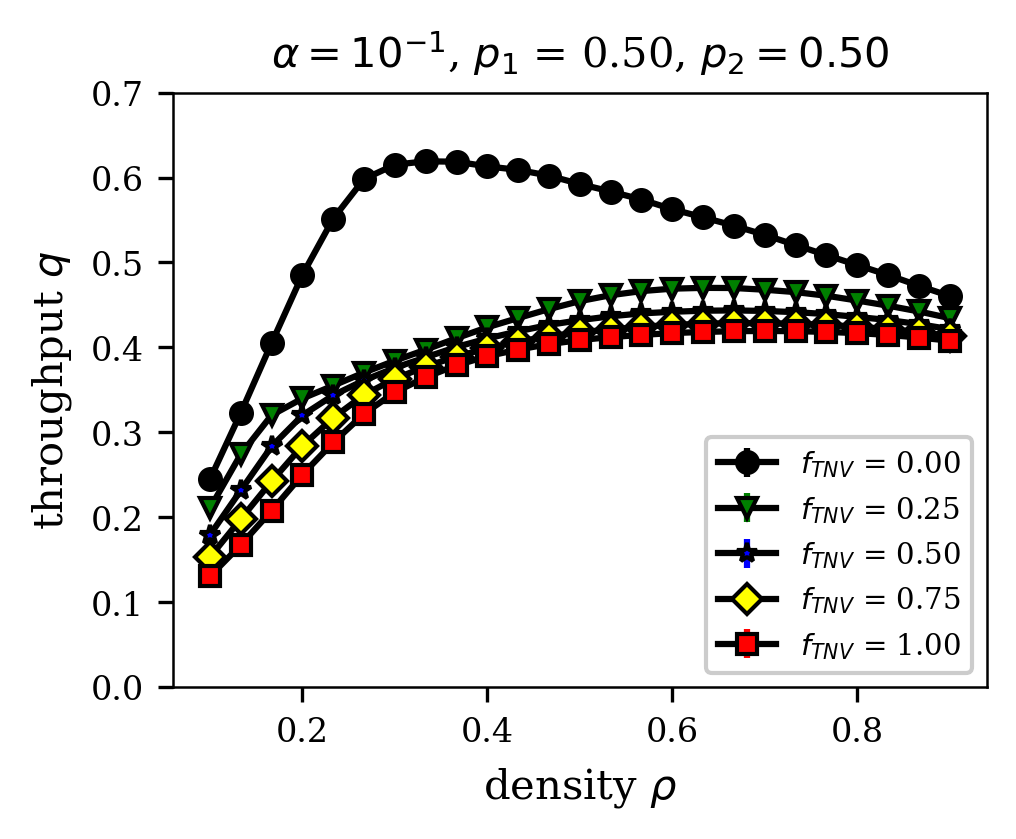

In [37]:
qdens_plotter2(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],"o","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter2(densities,df_0505_alpha1_tnv25["mean_q_arr"],df_0505_alpha1_tnv25["errorbars"],"v","green","solid",r"$f_{TNV}$ = %.2f" %(0.25))
qdens_plotter2(densities,df_0505_alpha1_tnv50["mean_q_arr"],df_0505_alpha1_tnv50["errorbars"],"*","blue","solid",r"$f_{TNV}$ = %.2f" %(0.50))
qdens_plotter2(densities,df_0505_alpha1_tnv75["mean_q_arr"],df_0505_alpha1_tnv75["errorbars"],"D","yellow","solid",r"$f_{TNV}$ = %.2f" %(0.75))
qdens_plotter2(densities,df_0505_alpha1_tnv1["mean_q_arr"],df_0505_alpha1_tnv1["errorbars"],"s","red","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter2(low_densities,DF_0505_low_a1_tnv01["mean_q_arr"],DF_0505_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=10^{-%.0f}$, $p_1$ = %.2f, $p_2 = %.2f$" %(1,0.5,0.5))
plt.ylim(0,0.7)
plt.legend()
plt.savefig('2lane_p_0505_alpha1_manyfracs' ,bbox_inches='tight')

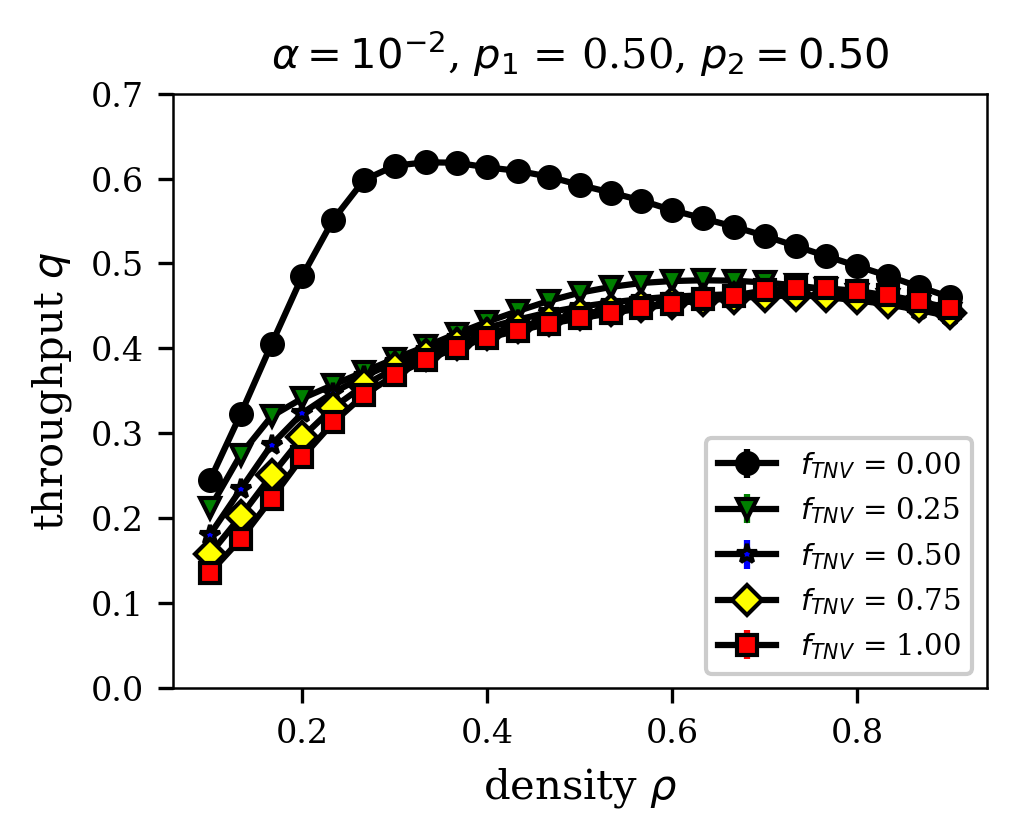

In [38]:
qdens_plotter2(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],"o","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter2(densities,df_0505_alpha2_tnv25["mean_q_arr"],df_0505_alpha2_tnv25["errorbars"],"v","green","solid",r"$f_{TNV}$ = %.2f" %(0.25))
qdens_plotter2(densities,df_0505_alpha2_tnv50["mean_q_arr"],df_0505_alpha2_tnv50["errorbars"],"*","blue","solid",r"$f_{TNV}$ = %.2f" %(0.50))
qdens_plotter2(densities,df_0505_alpha2_tnv75["mean_q_arr"],df_0505_alpha2_tnv75["errorbars"],"D","yellow","solid",r"$f_{TNV}$ = %.2f" %(0.75))
qdens_plotter2(densities,df_0505_alpha2_tnv1["mean_q_arr"],df_0505_alpha2_tnv1["errorbars"],"s","red","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter2(low_densities,DF_0505_low_a1_tnv01["mean_q_arr"],DF_0505_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.ylim(0,0.7)
plt.title(r"$\alpha=10^{-%.0f}$, $p_1$ = %.2f, $p_2 = %.2f$" %(2,0.5,0.5))
plt.legend()
plt.savefig('2lane_p_0505_alpha2_manyfracs' ,bbox_inches='tight')

In [39]:
df_0505_alpha1_tnv1['mean_q_arr'][np.argmax(df_0505_alpha1_tnv1["mean_q_arr"])]

0.4193200999999999

In [40]:
densities[np.argmax(df_0505_alpha1_tnv1["mean_q_arr"])]

0.7

In [41]:
df_0505_alpha1_tnv1['mean_q_arr'][np.argmax(df_0505_alpha1_tnv1["mean_q_arr"])]/densities[np.argmax(df_0505_alpha1_tnv1["mean_q_arr"])]

0.5990287142857142

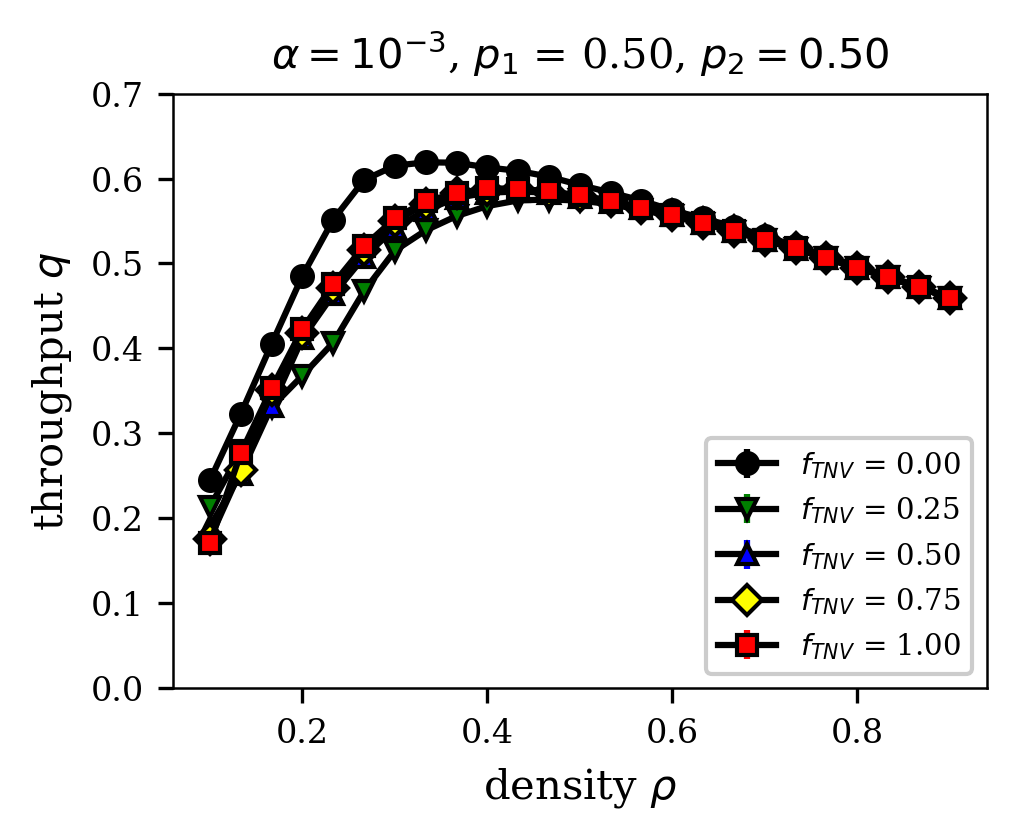

In [42]:
qdens_plotter2(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],"o","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter2(densities,df_0505_alpha3_tnv25["mean_q_arr"],df_0505_alpha3_tnv25["errorbars"],"v","green","solid",r"$f_{TNV}$ = %.2f" %(0.25))
qdens_plotter2(densities,df_0505_alpha3_tnv50["mean_q_arr"],df_0505_alpha3_tnv50["errorbars"],"^","blue","solid",r"$f_{TNV}$ = %.2f" %(0.50))
qdens_plotter2(densities,df_0505_alpha3_tnv75["mean_q_arr"],df_0505_alpha3_tnv75["errorbars"],"D","yellow","solid",r"$f_{TNV}$ = %.2f" %(0.75))
qdens_plotter2(densities,df_0505_alpha3_tnv1["mean_q_arr"],df_0505_alpha3_tnv1["errorbars"],"s","red","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter2(low_densities,DF_0505_low_a1_tnv01["mean_q_arr"],DF_0505_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=10^{-%.0f}$, $p_1$ = %.2f, $p_2 = %.2f$" %(3,0.5,0.5))
#plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$" %(10**-3,1,0))
#plt.title(r"$\alpha=%.4f$, $p_1$ = %.2f, $p_2 = %.2f$" %(10**-3,1,0))
plt.ylim(0,0.7)
plt.legend()
plt.savefig('2lane_p_0505_alpha3_manyfracs' ,bbox_inches='tight')

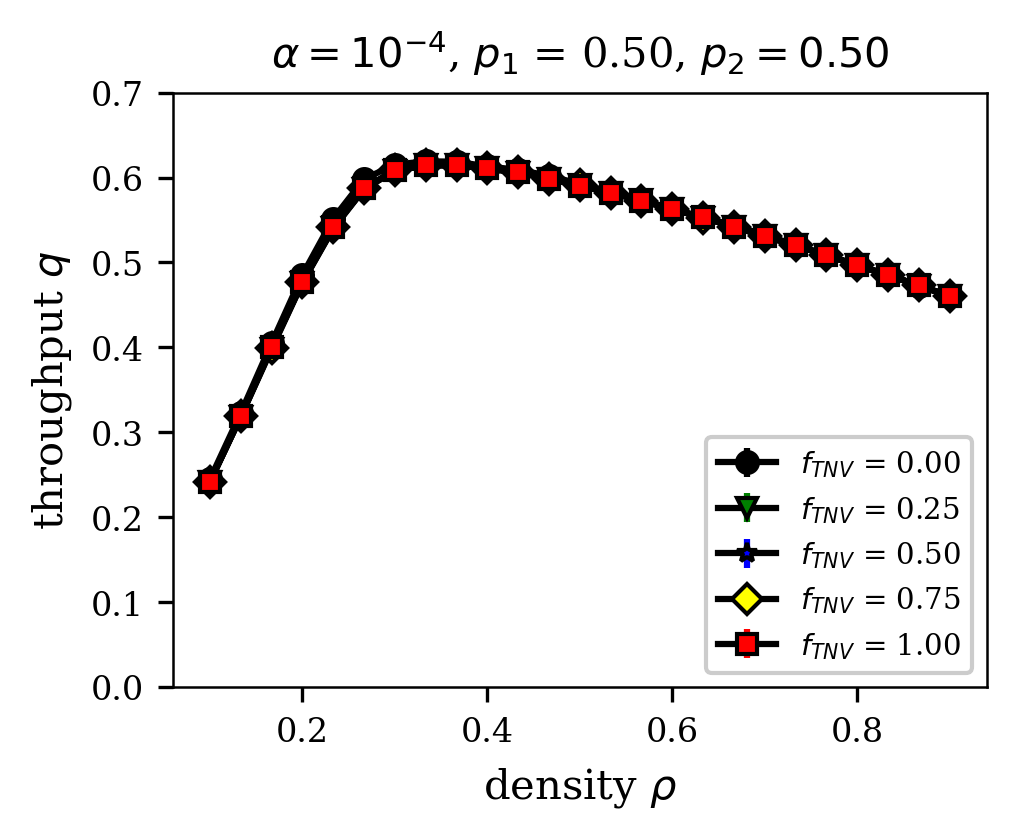

In [43]:
qdens_plotter2(densities,df_no_tnv["mean_q_arr"],df_no_tnv["errorbars"],"o","black","solid",r"$f_{TNV}$ = %.2f" %(0.0))
qdens_plotter2(densities,df_0505_alpha4_tnv25["mean_q_arr"],df_0505_alpha4_tnv25["errorbars"],"v","green","solid",r"$f_{TNV}$ = %.2f" %(0.25))
qdens_plotter2(densities,df_0505_alpha4_tnv50["mean_q_arr"],df_0505_alpha4_tnv50["errorbars"],"*","blue","solid",r"$f_{TNV}$ = %.2f" %(0.50))
qdens_plotter2(densities,df_0505_alpha4_tnv75["mean_q_arr"],df_0505_alpha4_tnv75["errorbars"],"D","yellow","solid",r"$f_{TNV}$ = %.2f" %(0.75))
qdens_plotter2(densities,df_0505_alpha4_tnv1["mean_q_arr"],df_0505_alpha4_tnv1["errorbars"],"s","red","solid",r"$f_{TNV}$ = %.2f" %(1.0))
#qdens_plotter2(low_densities,DF_0505_low_a1_tnv01["mean_q_arr"],DF_0505_low_a2_tnv01["errorbars"],"v","red","solid",r"$f_{TNV}$ = %.2f" %(0.1))




#plt.errorbar(densities, null_q_arr,np.array(null_errbar).T, marker = 'None', markerfacecolor = "black", linestyle = 'solid', color = 'black', markeredgecolor='black',label="No TNVs")
plt.ylabel('throughput '+r"$q$")
plt.xlabel('density '+ r"$\rho$")
plt.title(r"$\alpha=10^{-%.0f}$, $p_1$ = %.2f, $p_2 = %.2f$" %(4,0.5,0.5))
plt.ylim(0,0.7)
plt.legend()
plt.savefig('2lane_p_0505_alpha4_manyfracs' ,bbox_inches='tight')

In [44]:
for i in range(len(densities)):
    if df_p2_alpha1_tnv1['mean_q_arr'][i]>df_no_tnv["mean_q_arr"][i]:
        print(i)
        break

17


In [45]:
for i in range(len(densities)):
    if df_p2_alpha2_tnv1['mean_q_arr'][i]>df_no_tnv["mean_q_arr"][i]:
        print(i)
        break

15


In [46]:
densities[15]

0.6

# Trips

In [44]:
def trip_extractor(df,num_trials):
    #sorted_df = df.sort_values("tripity")
    ave_trip = df
    mean_trip = np.mean(ave_trip.reshape(-1, num_trials), axis=1)
    
    composite_list = [ave_trip[x:x+num_trials] for x in range(0, len(ave_trip),num_trials)]
    #composite_list
    errorbars = []

    for grp in range(len(composite_list)):
        errbars = []
        errbars.append(abs(np.percentile(composite_list[grp],25) - mean_trip[grp]))
        errbars.append(abs(np.percentile(composite_list[grp],75) - mean_trip[grp]))
        errorbars.append(errbars)

    results = {
        "ave_trip" : ave_trip,
        "mean_trip" : mean_trip,
        "errorbars" : errorbars
    }
    
    
    return results    


In [45]:
trips_0505_a1 = p0505_alpha1_tnv1['ave_trips'].to_numpy()
trips_0505_a2 = p0505_alpha2_tnv1['ave_trips'].to_numpy()
trips_0505_a3 = p0505_alpha3_tnv1['ave_trips'].to_numpy()
trips_0505_a4 = p0505_alpha4_tnv1['ave_trips'].to_numpy()

Trips_0505_a1 = trip_extractor(trips_0505_a1,num_trials)
Trips_0505_a2 = trip_extractor(trips_0505_a2,num_trials)
Trips_0505_a3 = trip_extractor(trips_0505_a3,num_trials)
Trips_0505_a4 = trip_extractor(trips_0505_a4,num_trials)

In [46]:
trips_0505_a1_tnv25 = p0505_alpha1_tnv25['ave_trips'].to_numpy()
trips_0505_a1_tnv50 = p0505_alpha1_tnv50['ave_trips'].to_numpy()
trips_0505_a1_tnv75 = p0505_alpha1_tnv75['ave_trips'].to_numpy()


Trips_0505_a1_tnv25 = trip_extractor(trips_0505_a1_tnv25,num_trials)
Trips_0505_a1_tnv50 = trip_extractor(trips_0505_a1_tnv50,num_trials)
Trips_0505_a1_tnv75 = trip_extractor(trips_0505_a1_tnv75,num_trials)

In [47]:
trips_0505_a2_tnv25 = p0505_alpha2_tnv25['ave_trips'].to_numpy()
trips_0505_a2_tnv50 = p0505_alpha2_tnv50['ave_trips'].to_numpy()
trips_0505_a2_tnv75 = p0505_alpha2_tnv75['ave_trips'].to_numpy()


Trips_0505_a2_tnv25 = trip_extractor(trips_0505_a2_tnv25,num_trials)
Trips_0505_a2_tnv50 = trip_extractor(trips_0505_a2_tnv50,num_trials)
Trips_0505_a2_tnv75 = trip_extractor(trips_0505_a2_tnv75,num_trials)

trips_0505_a3_tnv25 = p0505_alpha3_tnv25['ave_trips'].to_numpy()
trips_0505_a3_tnv50 = p0505_alpha3_tnv50['ave_trips'].to_numpy()
trips_0505_a3_tnv75 = p0505_alpha3_tnv75['ave_trips'].to_numpy()


Trips_0505_a3_tnv25 = trip_extractor(trips_0505_a3_tnv25,num_trials)
Trips_0505_a3_tnv50 = trip_extractor(trips_0505_a3_tnv50,num_trials)
Trips_0505_a3_tnv75 = trip_extractor(trips_0505_a3_tnv75,num_trials)

trips_0505_a4_tnv25 = p0505_alpha4_tnv25['ave_trips'].to_numpy()
trips_0505_a4_tnv50 = p0505_alpha4_tnv50['ave_trips'].to_numpy()
trips_0505_a4_tnv75 = p0505_alpha4_tnv75['ave_trips'].to_numpy()


Trips_0505_a4_tnv25 = trip_extractor(trips_0505_a4_tnv25,num_trials)
Trips_0505_a4_tnv50 = trip_extractor(trips_0505_a4_tnv50,num_trials)
Trips_0505_a4_tnv75 = trip_extractor(trips_0505_a4_tnv75,num_trials)


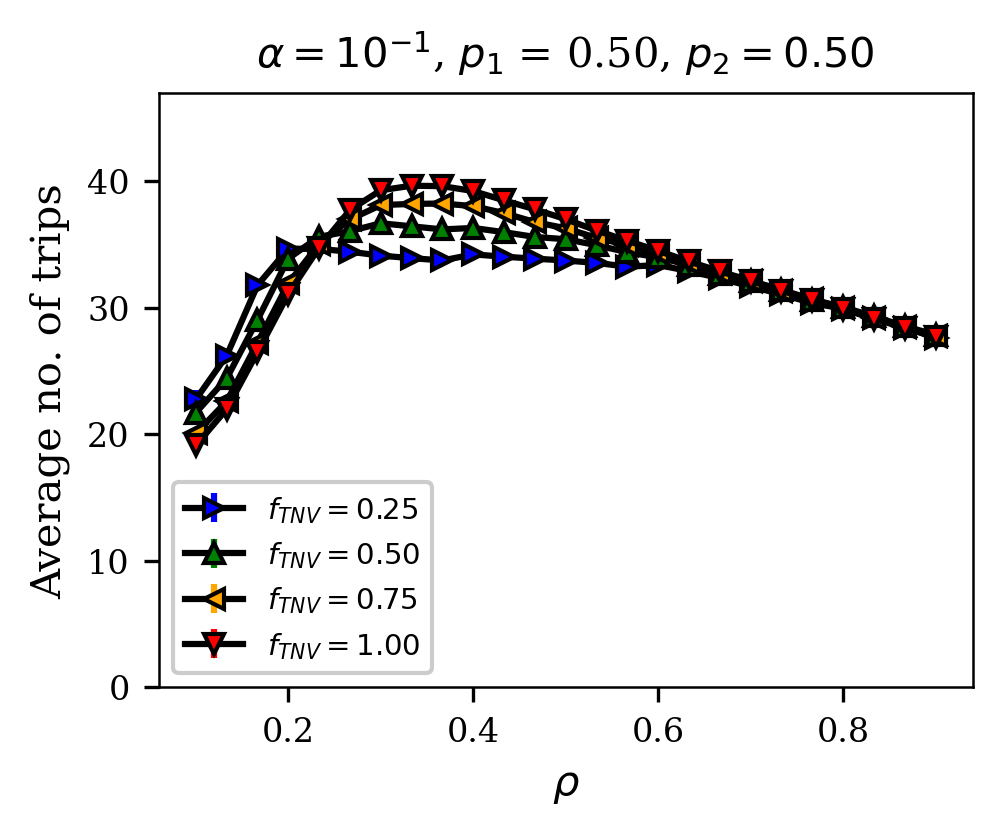

In [48]:
qdens_plotter2(densities, Trips_0505_a1_tnv25['mean_trip'], Trips_0505_a1_tnv25['errorbars'], ">", "blue", "-", r"$f_{TNV}=%.2f$" %(.25))
qdens_plotter2(densities, Trips_0505_a1_tnv50['mean_trip'], Trips_0505_a1_tnv50['errorbars'], "^", "green", "-", r"$f_{TNV}=%.2f$" %(.50))
qdens_plotter2(densities, Trips_0505_a1_tnv75['mean_trip'], Trips_0505_a1_tnv75['errorbars'], "<", "orange", "-", r"$f_{TNV}=%.2f$" %(.75))
qdens_plotter2(densities, Trips_0505_a1['mean_trip'], Trips_0505_a1['errorbars'], "v", "red", "-", r"$f_{TNV}=%.2f$" %(1))
#qdens_plotter2(densities, Trips_0505_a1['mean_trip'], Trips_0505_a1['errorbars'], "o", "orange", "-", r"$\alpha = %.4f$"%10**-2)
#qdens_plotter2(densities, Trips_0505_a1['mean_trip'], Trips_0505_a1['errorbars'], "^", "green", "-", r"$\alpha = %.4f$"%10**-3)
#qdens_plotter2(densities, Trips_0505_a1['mean_trip'], Trips_0505_a1['errorbars'], "<", "blue", "-", r"$\alpha = %.4f$"%10**-4)

#plt.errorbar(Trip_7525_a1['mean_trip'],Trip_7525_a1['mean_trip']-Trip_7525_a1['mean_trip'],linestyle = "solid", color="black")
plt.ylabel(r"Average no. of trips")
plt.xlabel(r"$\rho$")
plt.title(r"$\alpha=10^{-%.0f}$, $p_1$ = %.2f, $p_2 = %.2f$" %(1,0.5,0.5))
plt.ylim(0,47)
plt.legend()
plt.savefig('2lane_new_trips_0505_a1.png' ,bbox_inches='tight') 


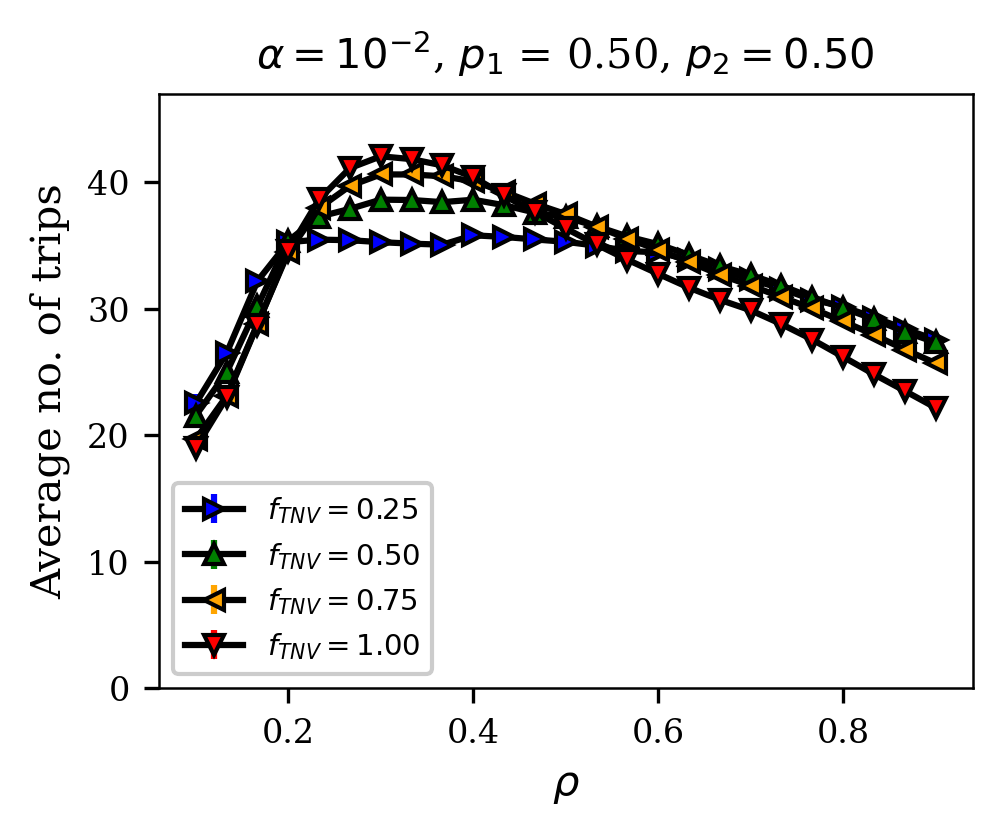

In [49]:
qdens_plotter2(densities, Trips_0505_a2_tnv25['mean_trip'], Trips_0505_a2_tnv25['errorbars'], ">", "blue", "-", r"$f_{TNV}=%.2f$" %(.25))
qdens_plotter2(densities, Trips_0505_a2_tnv50['mean_trip'], Trips_0505_a2_tnv50['errorbars'], "^", "green", "-", r"$f_{TNV}=%.2f$" %(.50))
qdens_plotter2(densities, Trips_0505_a2_tnv75['mean_trip'], Trips_0505_a2_tnv75['errorbars'], "<", "orange", "-", r"$f_{TNV}=%.2f$" %(.75))
qdens_plotter2(densities, Trips_0505_a2['mean_trip'], Trips_0505_a2['errorbars'], "v", "red", "-", r"$f_{TNV}=%.2f$" %(1))
#qdens_plotter2(densities, Trips_0505_a2['mean_trip'], Trips_0505_a2['errorbars'], "o", "orange", "-", r"$\alpha = %.4f$"%10**-2)
#qdens_plotter2(densities, Trips_0505_a2['mean_trip'], Trips_0505_a2['errorbars'], "^", "green", "-", r"$\alpha = %.4f$"%10**-3)
#qdens_plotter2(densities, Trips_0505_a2['mean_trip'], Trips_0505_a2['errorbars'], "<", "blue", "-", r"$\alpha = %.4f$"%10**-4)

#plt.errorbar(Trip_7525_a2['mean_trip'],Trip_7525_a2['mean_trip']-Trip_7525_a2['mean_trip'],linestyle = "solid", color="black")
plt.ylabel(r"Average no. of trips")
plt.xlabel(r"$\rho$")
plt.title(r"$\alpha=10^{-%.0f}$, $p_1$ = %.2f, $p_2 = %.2f$" %(2,0.5,0.5))
plt.ylim(0,47)
plt.legend()
plt.savefig('2lane_new_trips_0505_a2.png' ,bbox_inches='tight')


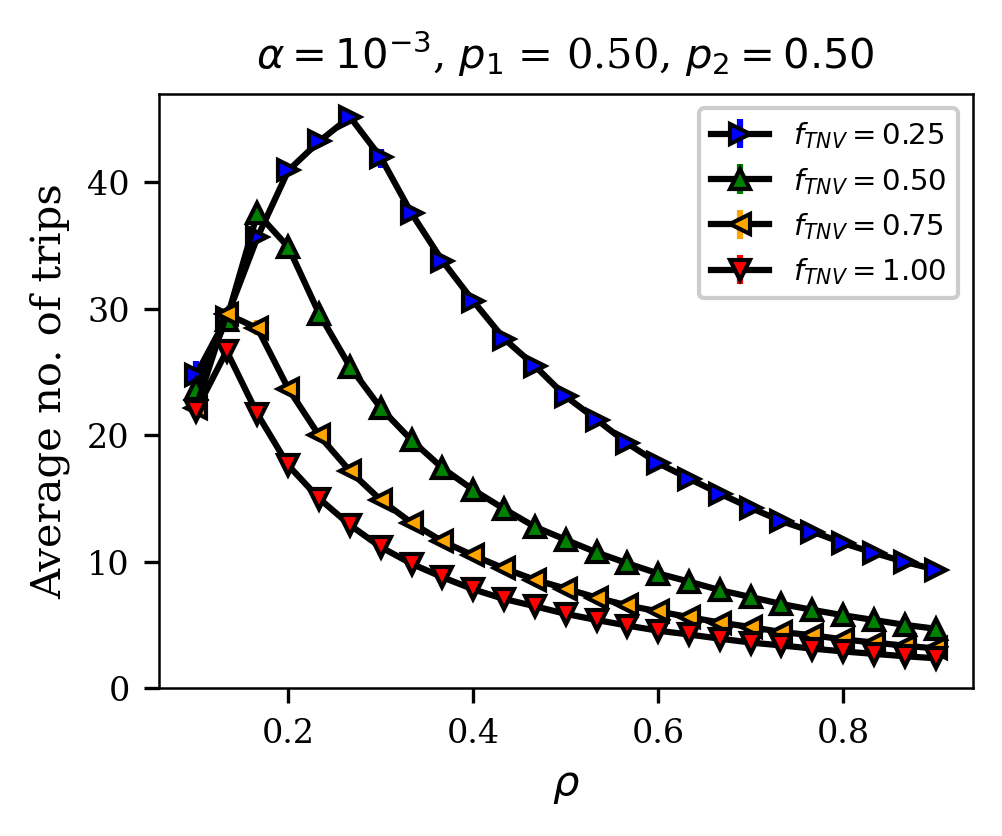

In [50]:
qdens_plotter2(densities, Trips_0505_a3_tnv25['mean_trip'], Trips_0505_a3_tnv25['errorbars'], ">", "blue", "-", r"$f_{TNV}=%.2f$" %(.25))
qdens_plotter2(densities, Trips_0505_a3_tnv50['mean_trip'], Trips_0505_a3_tnv50['errorbars'], "^", "green", "-", r"$f_{TNV}=%.2f$" %(.50))
qdens_plotter2(densities, Trips_0505_a3_tnv75['mean_trip'], Trips_0505_a3_tnv75['errorbars'], "<", "orange", "-", r"$f_{TNV}=%.2f$" %(.75))
qdens_plotter2(densities, Trips_0505_a3['mean_trip'], Trips_0505_a3['errorbars'], "v", "red", "-", r"$f_{TNV}=%.2f$" %(1))
#qdens_plotter2(densities, Trips_0505_a3['mean_trip'], Trips_0505_a3['errorbars'], "o", "orange", "-", r"$\alpha = %.4f$"%10**-2)
#qdens_plotter2(densities, Trips_0505_a3['mean_trip'], Trips_0505_a3['errorbars'], "^", "green", "-", r"$\alpha = %.4f$"%10**-3)
#qdens_plotter2(densities, Trips_0505_a3['mean_trip'], Trips_0505_a3['errorbars'], "<", "blue", "-", r"$\alpha = %.4f$"%10**-4)

#plt.errorbar(Trip_7525_a3['mean_trip'],Trip_7525_a3['mean_trip']-Trip_7525_a3['mean_trip'],linestyle = "solid", color="black")
plt.ylabel(r"Average no. of trips")
plt.xlabel(r"$\rho$")
plt.title(r"$\alpha=10^{-%.0f}$, $p_1$ = %.2f, $p_2 = %.2f$" %(3,0.5,0.5))
plt.ylim(0,47)
plt.legend()
plt.savefig('2lane_new_trips_0505_a3.png' ,bbox_inches='tight')


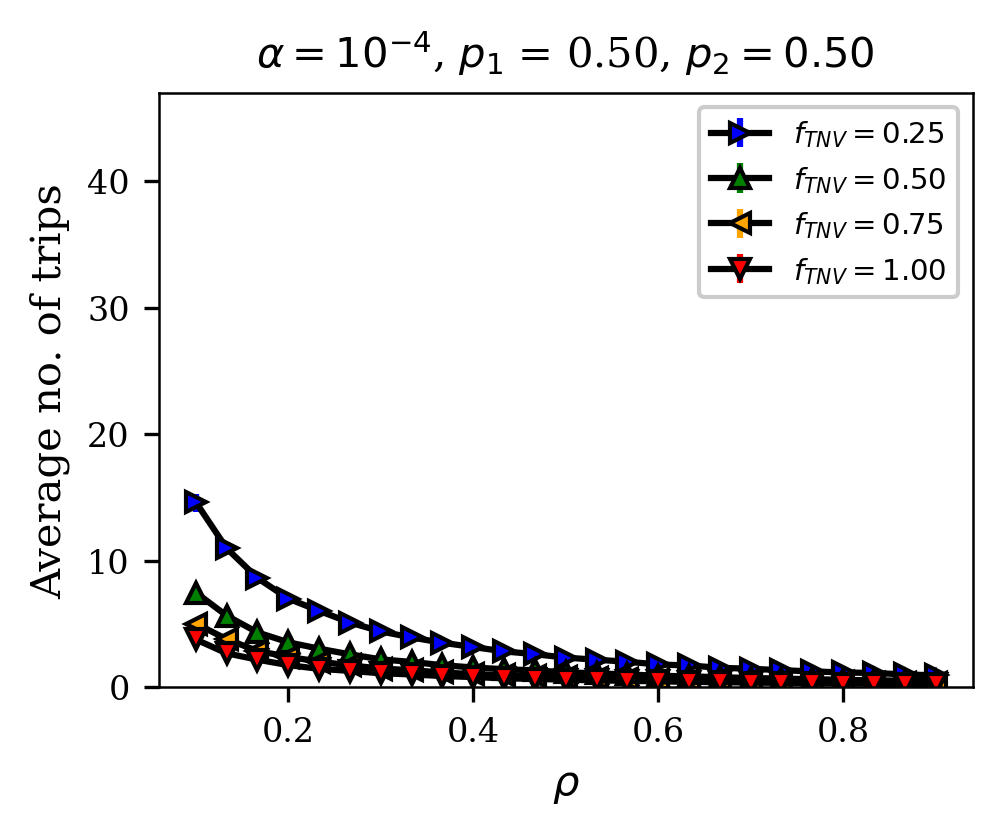

In [51]:
qdens_plotter2(densities, Trips_0505_a4_tnv25['mean_trip'], Trips_0505_a4_tnv25['errorbars'], ">", "blue", "-", r"$f_{TNV}=%.2f$" %(.25))
qdens_plotter2(densities, Trips_0505_a4_tnv50['mean_trip'], Trips_0505_a4_tnv50['errorbars'], "^", "green", "-", r"$f_{TNV}=%.2f$" %(.50))
qdens_plotter2(densities, Trips_0505_a4_tnv75['mean_trip'], Trips_0505_a4_tnv75['errorbars'], "<", "orange", "-", r"$f_{TNV}=%.2f$" %(.75))
qdens_plotter2(densities, Trips_0505_a4['mean_trip'], Trips_0505_a4['errorbars'], "v", "red", "-", r"$f_{TNV}=%.2f$" %(1))
#qdens_plotter2(densities, Trips_0505_a4['mean_trip'], Trips_0505_a4['errorbars'], "o", "orange", "-", r"$\alpha = %.4f$"%10**-2)
#qdens_plotter2(densities, Trips_0505_a4['mean_trip'], Trips_0505_a4['errorbars'], "^", "green", "-", r"$\alpha = %.4f$"%10**-3)
#qdens_plotter2(densities, Trips_0505_a4['mean_trip'], Trips_0505_a4['errorbars'], "<", "blue", "-", r"$\alpha = %.4f$"%10**-4)

#plt.errorbar(Trip_7525_a4['mean_trip'],Trip_7525_a4['mean_trip']-Trip_7525_a4['mean_trip'],linestyle = "solid", color="black")
plt.ylabel(r"Average no. of trips")
plt.xlabel(r"$\rho$")
plt.title(r"$\alpha=10^{-%.0f}$, $p_1$ = %.2f, $p_2 = %.2f$" %(4,0.5,0.5))
plt.ylim(0,47)
plt.legend()
plt.savefig('2lane_new_trips_0505_a4.png' ,bbox_inches='tight')


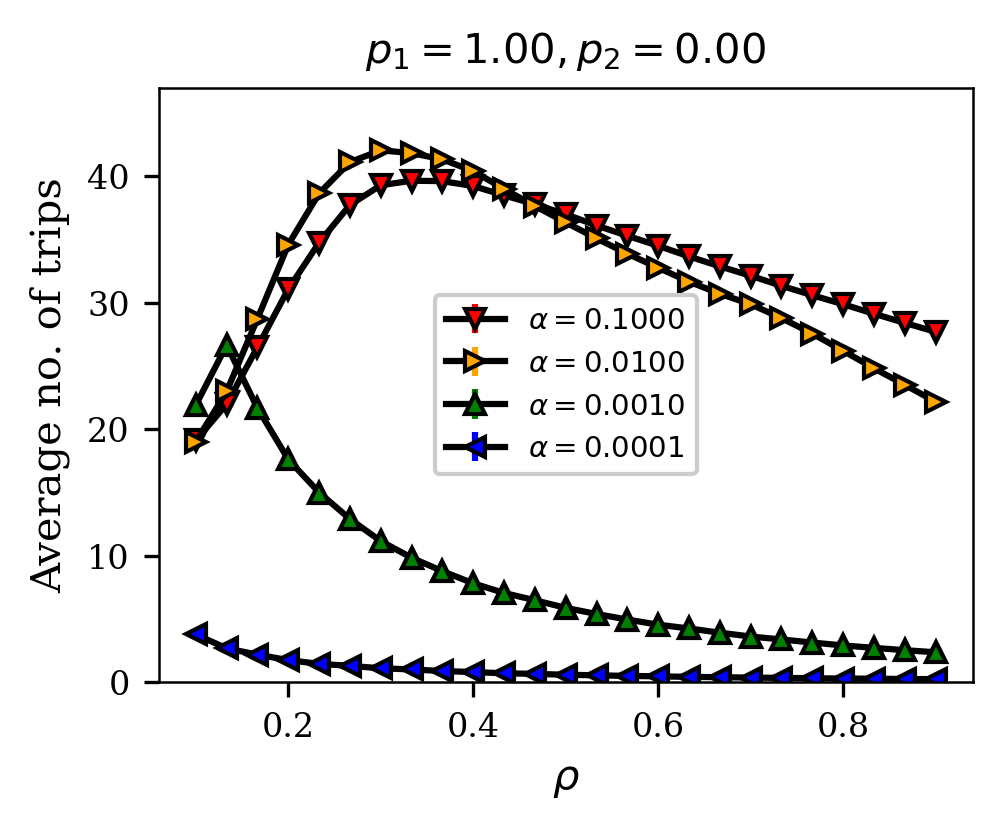

In [53]:
qdens_plotter2(densities, Trips_0505_a1['mean_trip'], Trips_0505_a1['errorbars'], "v", "red", "-", r"$\alpha = %.4f$"%10**-1)
qdens_plotter2(densities, Trips_0505_a2['mean_trip'], Trips_0505_a2['errorbars'], ">", "orange", "-", r"$\alpha = %.4f$"%10**-2)
qdens_plotter2(densities, Trips_0505_a3['mean_trip'], Trips_0505_a3['errorbars'], "^", "green", "-", r"$\alpha = %.4f$"%10**-3)
qdens_plotter2(densities, Trips_0505_a4['mean_trip'], Trips_0505_a4['errorbars'], "<", "blue", "-", r"$\alpha = %.4f$"%10**-4)

#plt.errorbar(Trip_7525_a1['mean_trip'],Trip_7525_a1['mean_trip']-Trip_7525_a1['mean_trip'],linestyle = "solid", color="black")
plt.ylabel(r"Average no. of trips")
plt.xlabel(r"$\rho$")
plt.title(r"$p_{1}=%.2f,p_{2}=%.2f$"%(1,0))
plt.ylim(0,47)
plt.legend()
plt.savefig('2lane_new_trips_0505.png' ,bbox_inches='tight') 
